In [324]:
import pandas as pd
import numpy as np
from psaw import PushshiftAPI
import datetime as dt
from bs4 import BeautifulSoup 
import requests
import re
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import svm, datasets
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [325]:
url_list=[]
for page in range(1,100):
    try: url_list.append("https://api.adzuna.com:443/v1/api/jobs/us/search/"+ str(page) +"?app_id=d3330ea8&app_key=cbcbe79274381fae5af07fb6828067ce&results_per_page=100&where=florida&sort_direction=up&sort_by=date")
    except:
        pass

In [326]:
spot = 0
initial_data = []
for url in url_list:
    initial_data.append(requests.get(url).json())
    print(str(spot) + ' missisipi')
    spot += 1
    time.sleep(1)

0 missisipi
1 missisipi
2 missisipi
3 missisipi
4 missisipi
5 missisipi
6 missisipi
7 missisipi
8 missisipi
9 missisipi
10 missisipi
11 missisipi
12 missisipi
13 missisipi
14 missisipi
15 missisipi
16 missisipi
17 missisipi
18 missisipi
19 missisipi
20 missisipi
21 missisipi
22 missisipi
23 missisipi
24 missisipi
25 missisipi
26 missisipi
27 missisipi
28 missisipi
29 missisipi
30 missisipi
31 missisipi
32 missisipi
33 missisipi
34 missisipi
35 missisipi
36 missisipi
37 missisipi
38 missisipi
39 missisipi
40 missisipi
41 missisipi
42 missisipi
43 missisipi
44 missisipi
45 missisipi
46 missisipi
47 missisipi
48 missisipi
49 missisipi
50 missisipi
51 missisipi
52 missisipi
53 missisipi
54 missisipi
55 missisipi
56 missisipi
57 missisipi
58 missisipi
59 missisipi
60 missisipi
61 missisipi
62 missisipi
63 missisipi
64 missisipi
65 missisipi
66 missisipi
67 missisipi
68 missisipi
69 missisipi
70 missisipi
71 missisipi
72 missisipi
73 missisipi
74 missisipi
75 missisipi
76 missisipi
77 missis

In [327]:
dfMichaelFlorida = []
for x in range(0, len(initial_data)):
    for y in initial_data[x]['results']:
        dfMichaelFlorida.append(y)

In [328]:
dfMichaelFlorida[0]

{'company': {'__CLASS__': 'Adzuna::API::Response::Company',
  'display_name': 'Taylor Harmon Search Group'},
 'salary_is_predicted': '0',
 'redirect_url': 'https://www.adzuna.com/land/ad/703305167?se=CRxVZTSFSaiwGB8jN3XzrQ&utm_medium=api&utm_source=d3330ea8&v=53AF526FE3FD9FF232BDD67282562177D105420C',
 'category': {'label': 'Unknown',
  '__CLASS__': 'Adzuna::API::Response::Category',
  'tag': 'unknown'},
 'description': 'Excellent opportunity Great reputation This respected, well known agency is growing and has an opening in their commercial lines department for an Account Manager. This position will be working with small to middle market accounts. Responsibilities to include: Assist AE in obtaining, maintaining, expanding and servicing commercial lines accounts. Provide client service such as policy changes, quoting new business, remarketing renewals, and other related duties. Obtain information from the clien…',
 'title': 'Commercial Lines Account Manager',
 'latitude': 18.362063,
 '

In [329]:
FinishedFlorida = pd.DataFrame()
FinishedFlorida['company'] =  [dfMichaelFlorida[x]['company']['display_name'] for x in range(0, len(dfMichaelFlorida))]
FinishedFlorida['created_date'] = [dfMichaelFlorida[x]['created'][0:10] for x in range(0, len(dfMichaelFlorida))]
FinishedFlorida['title']= [dfMichaelFlorida[x]['title']for x in range(0, len(dfMichaelFlorida))]
FinishedFlorida['salary']= [dfMichaelFlorida[x]['salary_is_predicted']for x in range(0, len(dfMichaelFlorida))]
FinishedFlorida['sector']= [dfMichaelFlorida[x]['category']['label']for x in range(0, len(dfMichaelFlorida))]

FinishedFlorida.drop_duplicates(inplace=True)
FinishedFlorida.to_csv('FinishedFlorida.csv')


In [330]:
FinishedFlorida['sector'].value_counts()

Healthcare & Nursing Jobs           965
Unknown                             127
PR, Advertising & Marketing Jobs     95
IT Jobs                              15
Engineering Jobs                     11
Consultancy Jobs                      8
Sales Jobs                            6
Retail Jobs                           2
Graduate Jobs                         2
Hospitality & Catering Jobs           1
Trade & Construction Jobs             1
Customer Services Jobs                1
Manufacturing Jobs                    1
Name: sector, dtype: int64

In [331]:
yaxis = np.linspace(0,500)

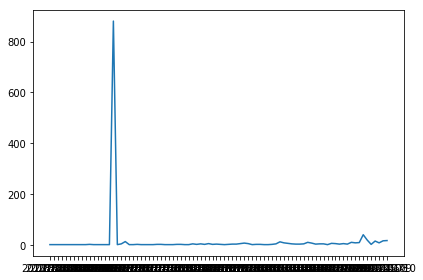

In [339]:
plt.plot(FinishedFlorida['created_date'].value_counts().sort_index());
plt.tight_layout()

In [340]:
FinishedFlorida['created_date'].value_counts().sort_index()

2017-12-06      1
2018-03-07      1
2018-03-08      1
2018-03-18      1
2018-07-24      1
2018-08-09      1
2018-08-22      1
2018-08-28      1
2018-08-30      1
2018-09-06      1
2018-09-07      2
2018-09-09      1
2018-09-14      1
2018-09-18      1
2018-09-23      1
2018-09-26      1
2018-09-28    881
2018-09-29      1
2018-09-30      4
2018-10-02     13
2018-10-03      1
2018-10-10      1
2018-10-13      2
2018-10-14      1
2018-10-15      1
2018-10-16      1
2018-10-17      1
2018-10-25      2
2018-10-27      2
2018-10-28      1
             ... 
2018-12-12      2
2018-12-13      4
2018-12-14     12
2018-12-15      8
2018-12-16      6
2018-12-17      4
2018-12-18      3
2018-12-19      3
2018-12-20      4
2018-12-21     10
2018-12-22      7
2018-12-23      3
2018-12-24      4
2018-12-25      4
2018-12-26      1
2018-12-27      6
2018-12-28      5
2018-12-29      3
2018-12-30      5
2018-12-31      3
2019-01-01     10
2019-01-02      8
2019-01-03      9
2019-01-04     40
2019-01-05

In [334]:
newdf = []
for x in range(0, len(dfMichaelFlorida)):
    newdf.append(dfMichaelFlorida[x]['category'])

In [335]:
labels = []
for x in range(0, len(newdf)):
    labels.append( newdf[x]['label'])
labels = pd.DataFrame(labels, columns=['label'])

In [336]:
labels['label'].value_counts()

Healthcare & Nursing Jobs           1096
Unknown                              156
PR, Advertising & Marketing Jobs      96
IT Jobs                               15
Engineering Jobs                      11
Consultancy Jobs                       8
Sales Jobs                             6
Graduate Jobs                          2
Retail Jobs                            2
Hospitality & Catering Jobs            1
Manufacturing Jobs                     1
Customer Services Jobs                 1
Trade & Construction Jobs              1
Name: label, dtype: int64

In [337]:
len(labels)

#369 Looks to be cap?

1396

In [338]:
plt.hist()

TypeError: hist() missing 1 required positional argument: 'x'

In [ ]:
res = requests.get(url)
res.status_code

In [ ]:
initial_data[0]

In [ ]:
jsondict = res.json()
jsondict.keys()

In [ ]:
results=[]
for x in jsondict['results']:
    results.append(x)

In [ ]:
df = pd.DataFrame()

for x in range(0,len(results)):
    df[''(results[x]['title'])